![kickstarter-logo](https://ksr-static.imgix.net/tq0sfld-kickstarter-logo-green.png?ixlib=rb-2.1.0&s=0cce952d7b55823ff451a58887a0c578)

# Workshop: Kickstarter data

Kickstarter is a crowdfunding website. Anyone can launch a fund to build something cool and anybody can chip in! It's an amazing resource for indie builders and when it first launched it was a really novel way to raise money around an idea.

We're going to go through the process of exploring and engineering data, building a model, and visualising the results. We'll try to predict wheher or not a kickstarter project will be funded.

**Links**
 - Kickstarter website: https://www.kickstarter.com/
 - Shared folder for class: https://drive.google.com/open?id=1PlcVyu8PmquwxkqAAZO0mSidS68xbNZW
 - This code: https://git.generalassemb.ly/DSga38/ds_ga_38

# 1. Load data

First of all we just load up the data and take a peek at what we have.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

# We have two columns that should be dtype 'datetime'
kaggle_data = pd.read_csv('~/Desktop/Work/DataScience/kickstarter/ks-projects-201801.csv', parse_dates=['deadline', 'launched'])

In [10]:
kaggle_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [23]:
# Filter relevant
kaggle_data['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [4]:
grid_search.best_score_

0.6638501108247917

In [53]:
grid_search.best_params_

{'alpha': 0.01389495494373136}

In [54]:
# Hold out sample - 'live' and 'undefined' projects are already funded so keep separate
is_not_finished = kaggle_data['state'].isin(['live', 'undefined'])

# ~ is bitwise operator for NOT, i.e. projects which are 'failed', 'successful', 'canceled' and 'suspended'
kaggle_data_filtered = kaggle_data[~is_not_finished]

train, test = train_test_split(kaggle_data_filtered, train_size=0.7, test_size=0.3, random_state=1001)

SGDClassifier(alpha=0.01389495494373136, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# Just so you can see the content has indeed been filtered: we dropped 6,361 rows
before = len(kaggle_data)
end = len(kaggle_data_filtered)
end - before

-6361

In [13]:
# Example of string formatting
train_set_size = len(train)
print('Number of training rows = {:,d}'.format(train_set_size))

Number of training rows = 260,609


In [14]:
test_set_size = len(test)
print('Number of test rows = {:,d}'.format(test_set_size))

Number of test rows = 111,690


The detailed results are available on the `cv_results_`, which is a dictionary. Below we print the keys

In [55]:
list(grid_search.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_alpha',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

### Visualising the grid search

Below we're plotting the scores for each value of the hyperparameter `alpha`. Remember that for each value of `alpha` we do 5-fold cross validation, so we actually get 5 different scores!

The plot shows the average score over all 5 experiments for each of the grid search values. **But that is not the whole story!**. When `alpha` is low (which makes the model more flexible and prone to overfitting), we can see that there is way more variance between individual experiments, which suggests that the model has much more **variance** even though some experiments showed low **bias** (i.e. a high score). How would you choose the best value?

In [15]:
train.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

$10^{-2}$ looks like a good balance with a high score on average and a bit of variance. If you were feeling more risk averse, you might take the point to the right with a very slightly lower average score but much less variance.

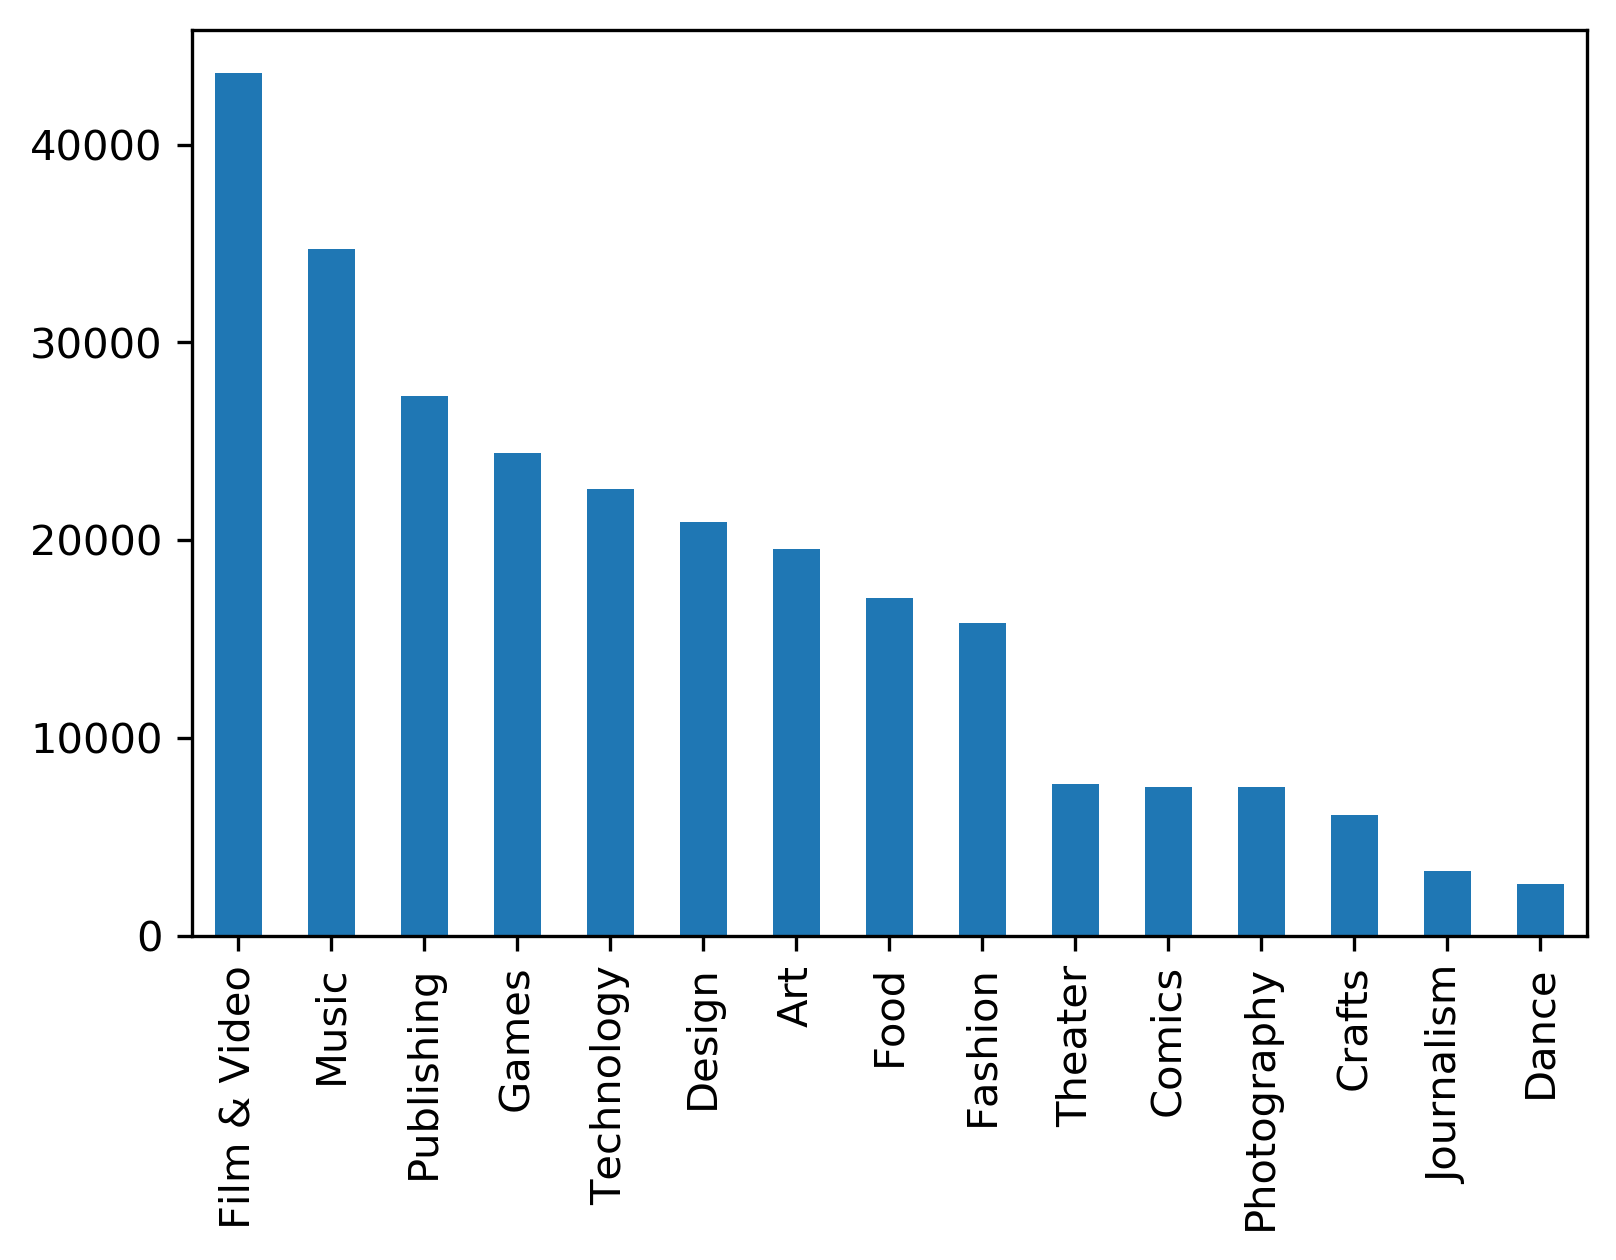

In [6]:
# Analyse single feature 'main_category'
fg, ax = plt.subplots(dpi=300)
train['main_category'].value_counts().plot(kind='bar', ax=ax);

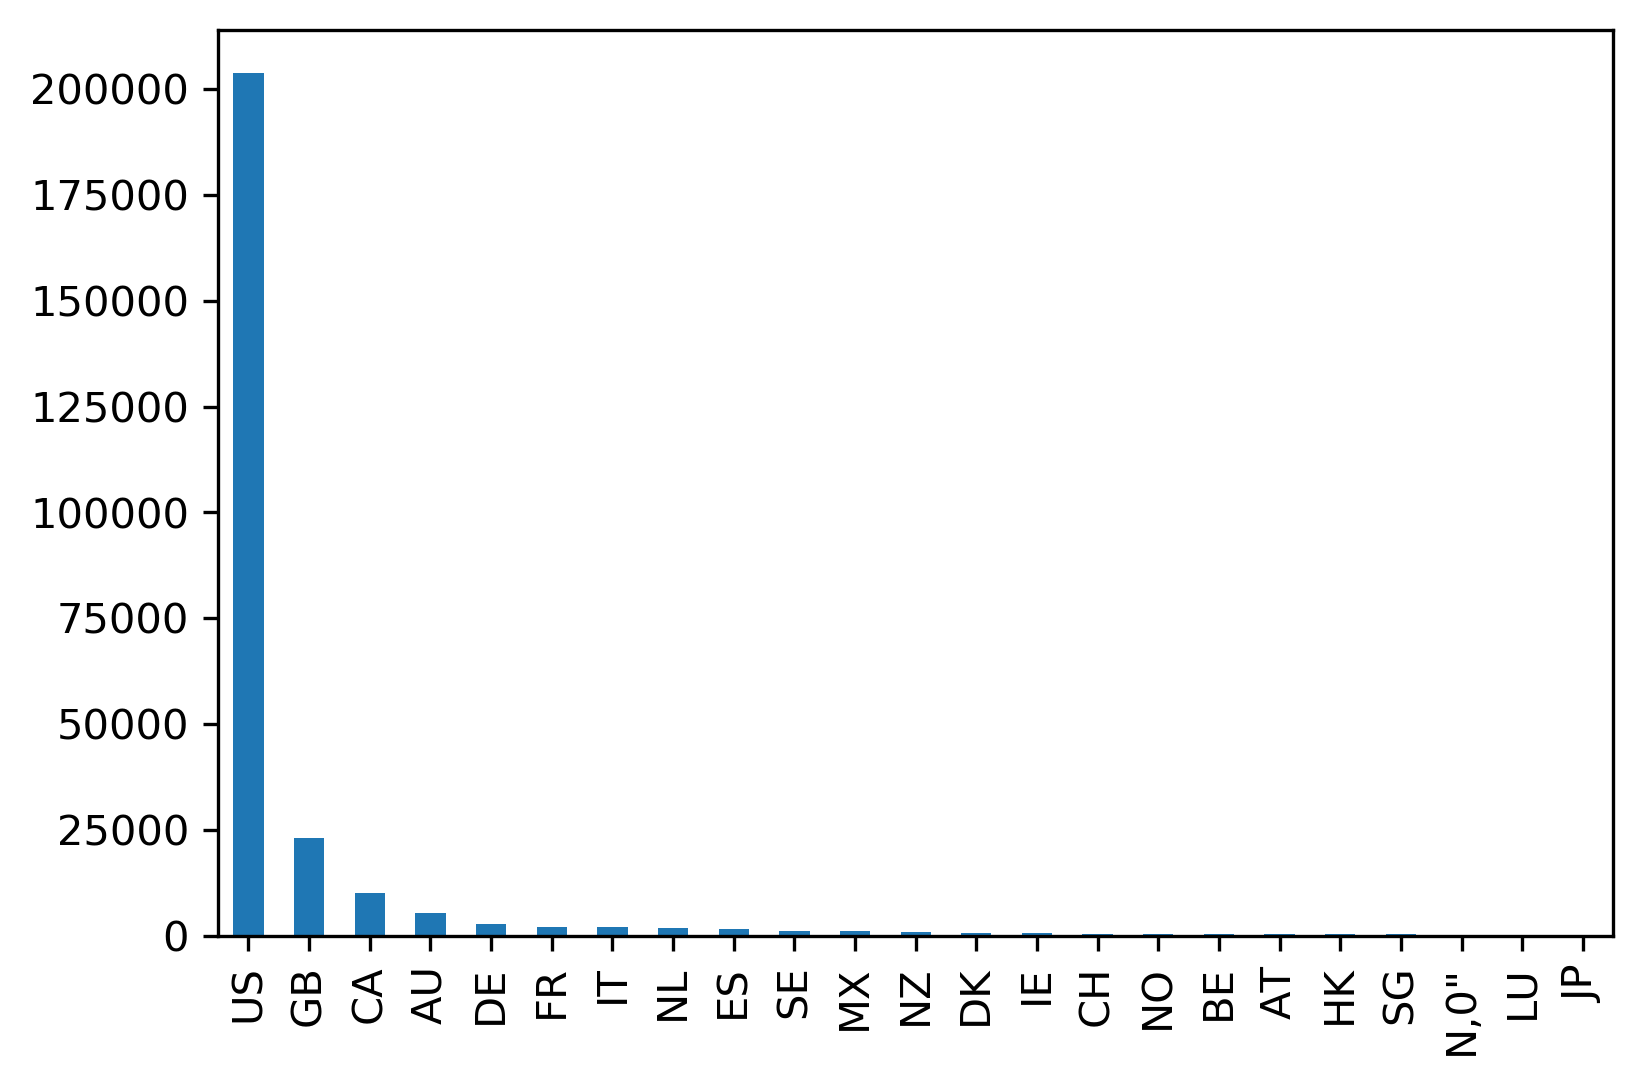

In [24]:
# Analyse single feature 'country'
fg, ax = plt.subplots(dpi=300)
train['country'].value_counts().plot(kind='bar', ax=ax);

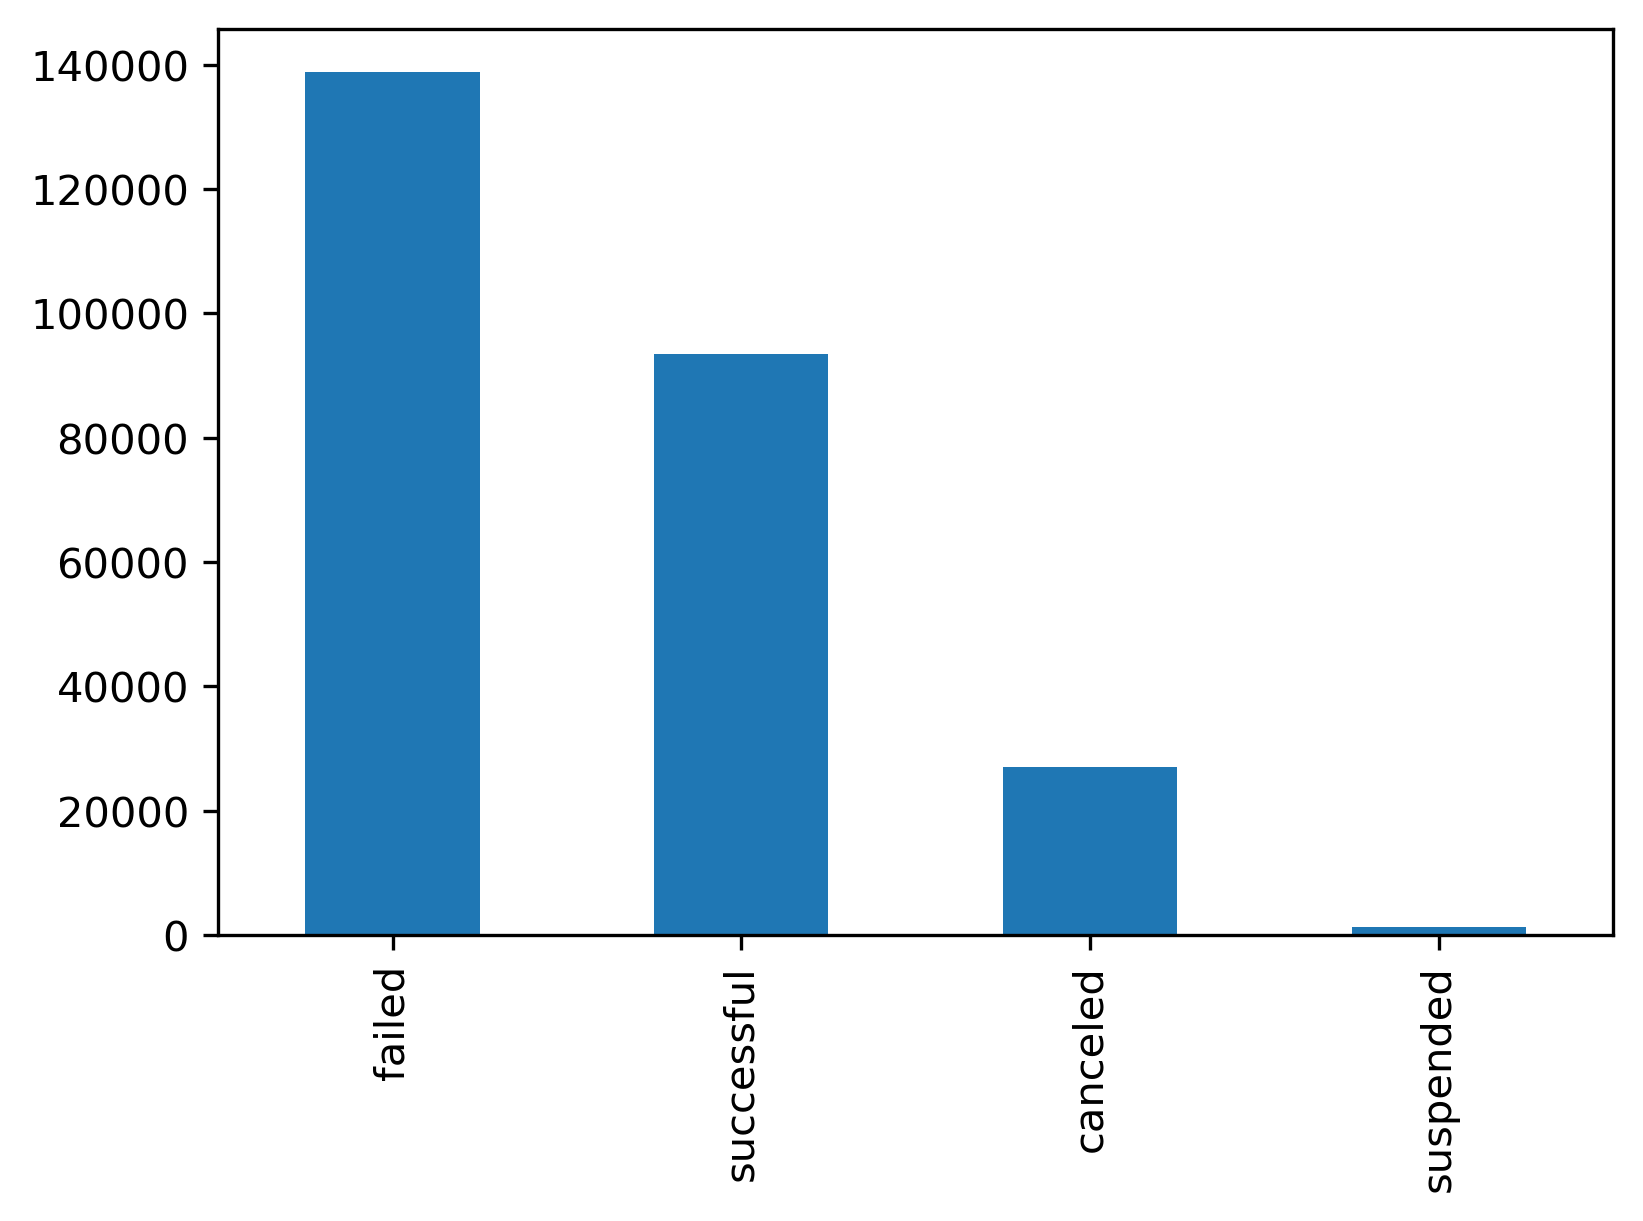

In [16]:
# Distribution of 'state' column values
fg, ax = plt.subplots(dpi=300);
train['state'].value_counts().plot(kind='bar', ax=ax);

In [17]:
# Are the project 'name' values unique? No!
train['name'].is_unique

False

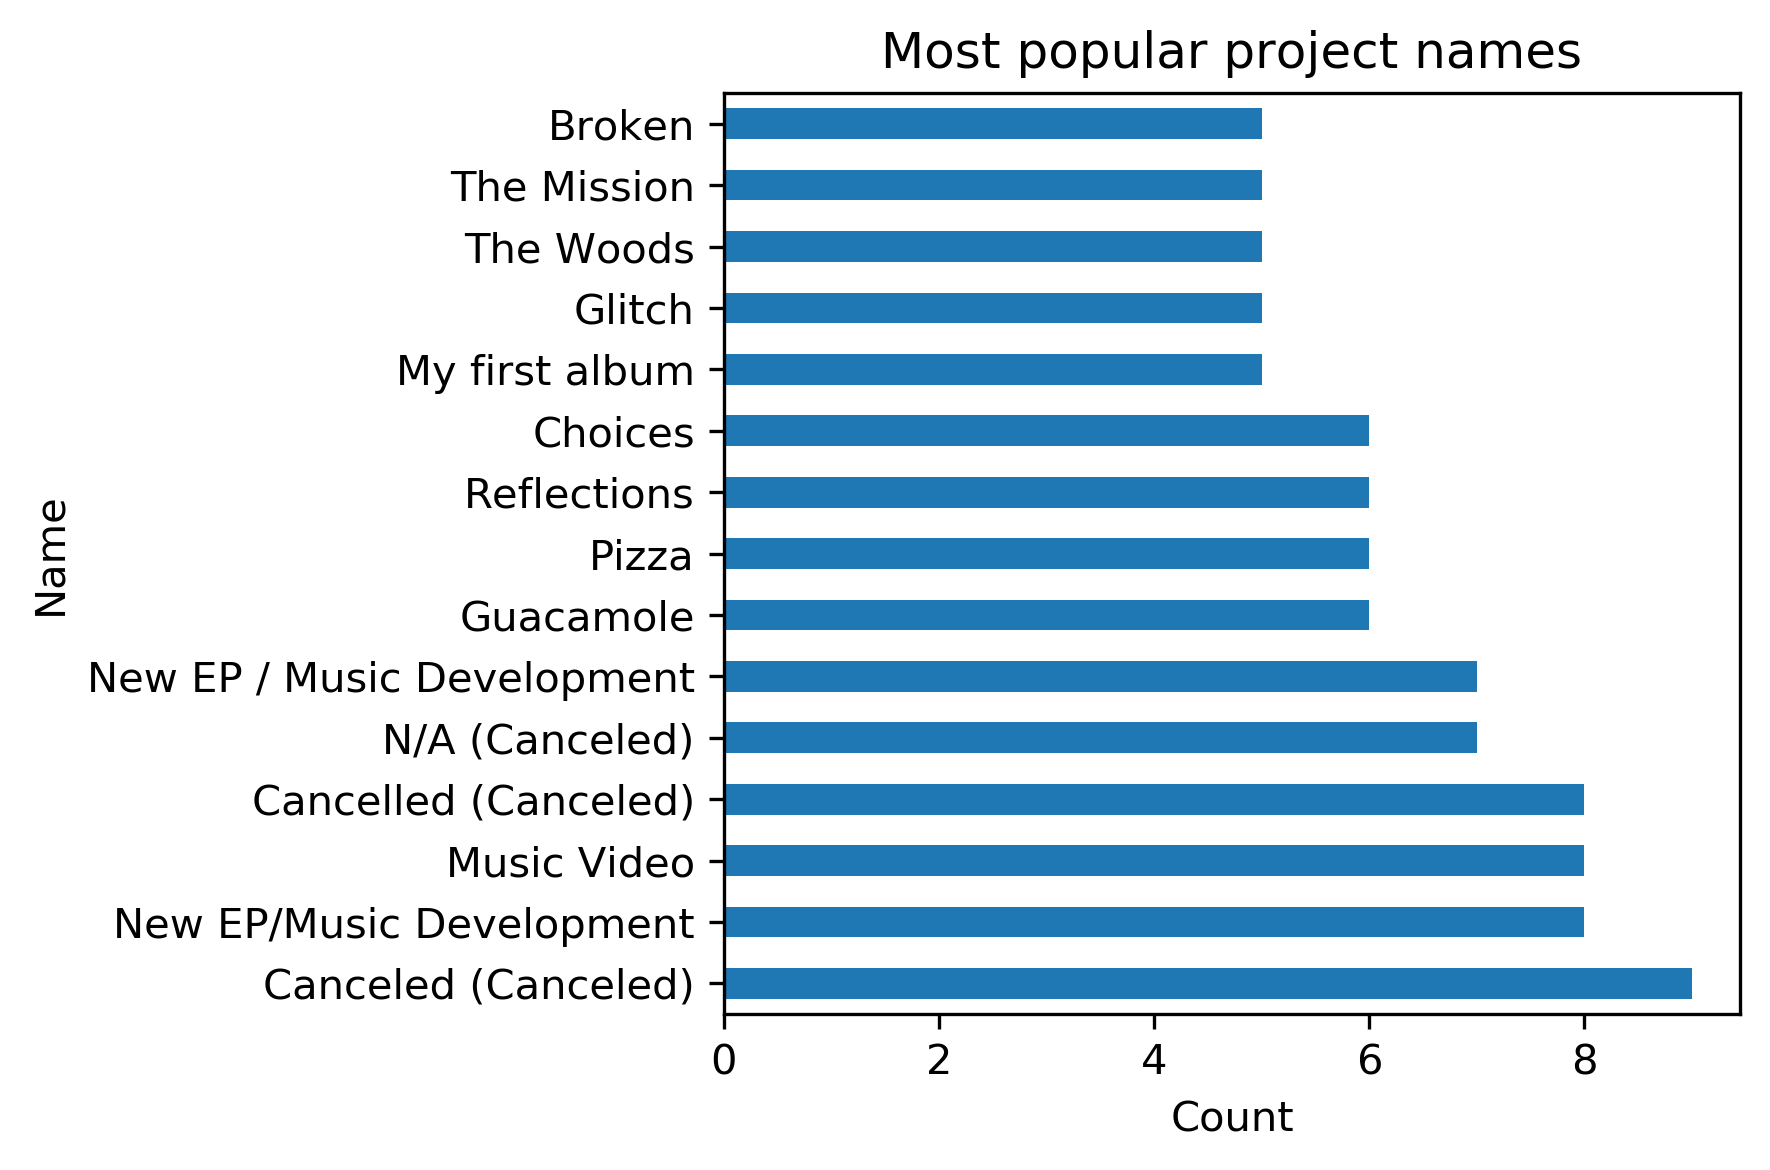

In [18]:
# What are the top 15 most popular project names?
fg, ax = plt.subplots(dpi=300);
train['name'].value_counts().head(15).plot(kind='barh', ax=ax);
ax.set_title('Most popular project names');
ax.set_xlabel('Count');
ax.set_ylabel('Name');
fg.tight_layout();

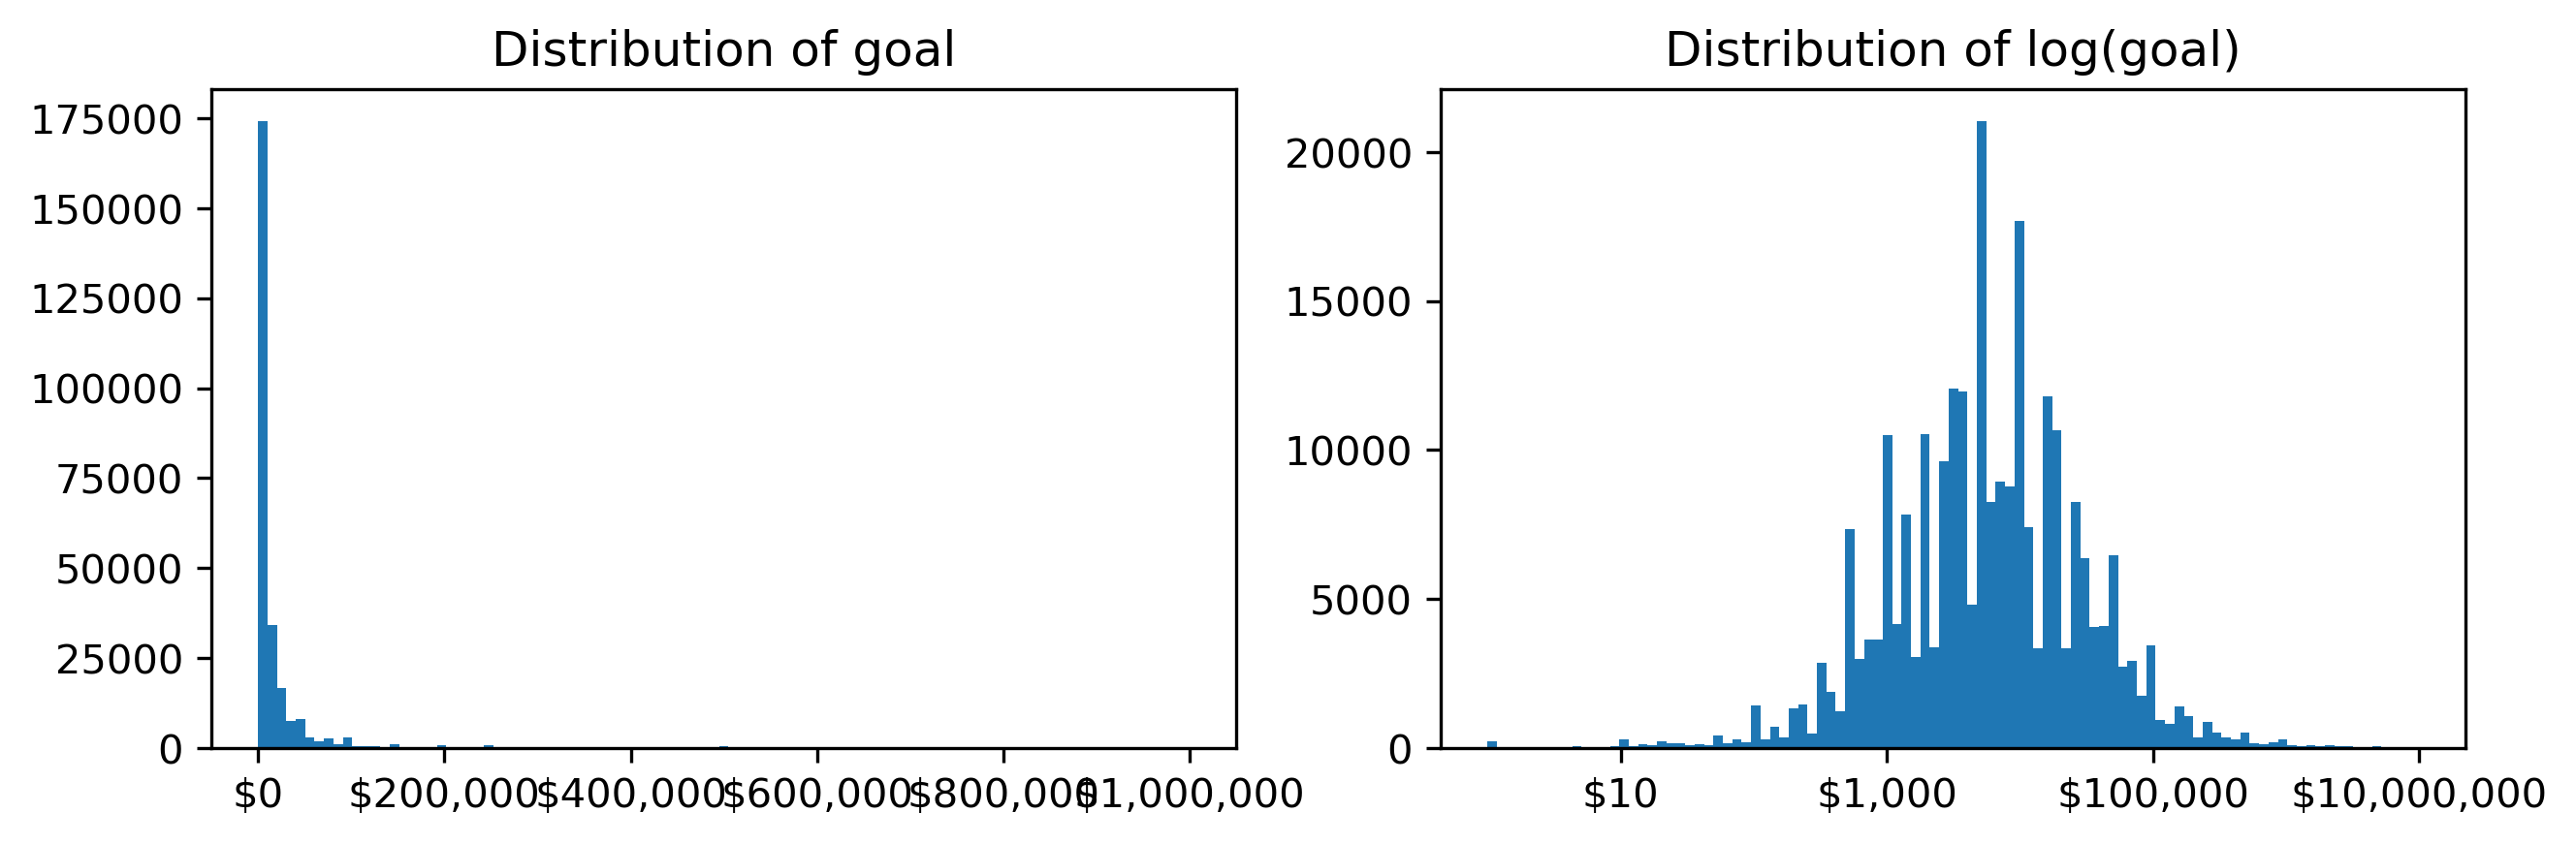

In [19]:
# The 'usd_goal_real' column holds the total amount of money the project tried to raise
fg, axs = plt.subplots(dpi=300, ncols=2, figsize=(10, 3))

# Normal hist
bins = np.linspace(0, 10e5, 100)
train['usd_goal_real'].hist(bins=bins, grid=False, ax=axs[0]);
axs[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'));
axs[0].set_title('Distribution of goal');

# Logged hist
bins = np.logspace(0, 7, 100)
axs[1].set_xscale('log');
axs[1].set_title('Distribution of log(goal)');
train['usd_goal_real'].hist(bins=bins, grid=False, ax=axs[1]);
axs[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'));

**VERY IMPORTANT** Note that I use the same scaling as the training set. So we use `X_train[...].mean()` and **NOT** `X[...].mean()` - otherwise we would be changing our features to match the test set better. If this doesn't make sense, think about it this way:

 - The model MUST NOT have any information from the future.
 - The mean of the test set is not available at training time, so we shouldn't use it at predict time

In [65]:
# Looks like the lower the goal, the more successful the project

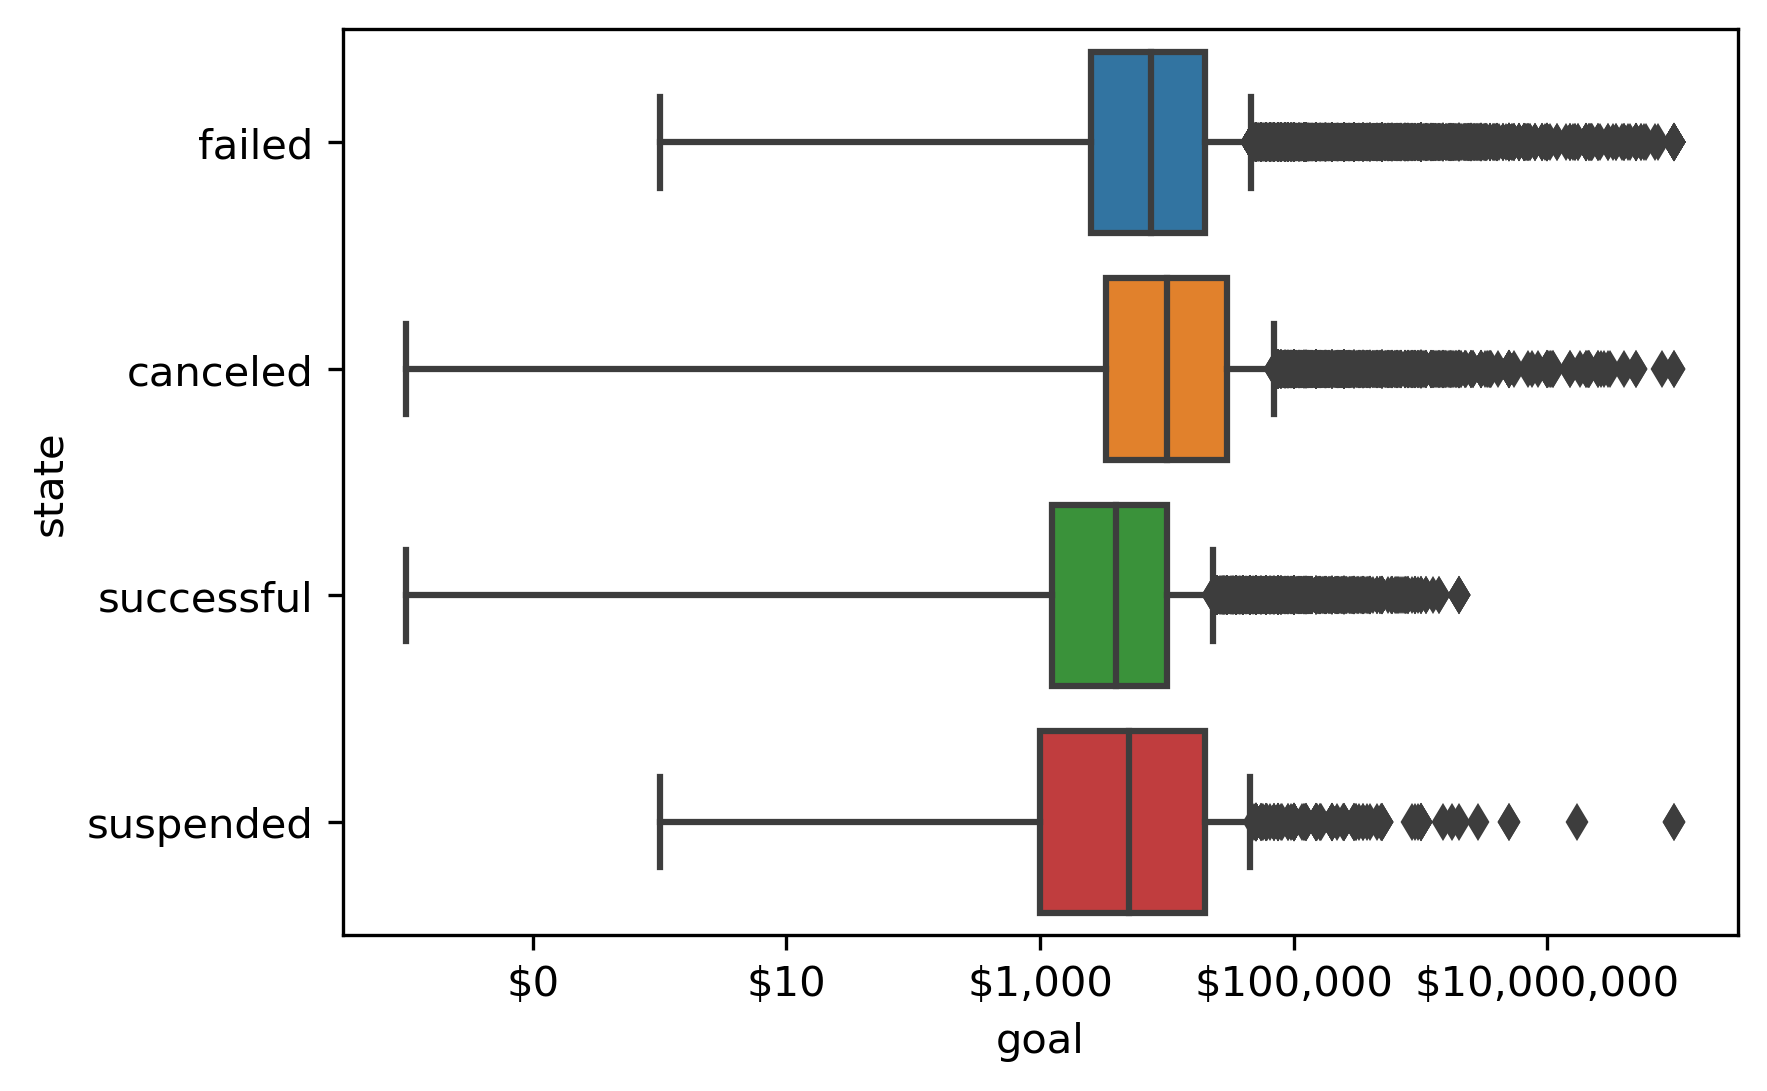

In [20]:
# EXERCISE 2.2
fg, ax = plt.subplots(dpi=300)
ax.set_xscale('log')

sns.boxplot(data=train, x='goal', y='state')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

For categoricals, we need to check that there are no new values. The function below show we have no surprises so let's keep going!

In [71]:
set(train['main_category'].unique()) - set(test['main_category'].unique())

set()

In [72]:
set(test['main_category'].unique()) - set(train['main_category'].unique())

set()

In [73]:
X_test = pd.concat([
    test[['whacky_name', 'launched_on_weekend']].astype(int),
    test[['name_length', 'project_duration_days', 'usd_goal_real']],
    pd.get_dummies(test['main_category'], drop_first=True),
], axis=1)
X_test['usd_goal_real'] = np.log(X_test['usd_goal_real'])
X_test['usd_goal_real'] = (X_test['usd_goal_real'] - X['usd_goal_real'].mean()) / X['usd_goal_real'].std()
X_test['name_length'] = (X_test['name_length'] - X['name_length'].mean()) / X['name_length'].std()

51% not too bad!

In [74]:
metrics.accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))

0.518184260005372

# 7. Pipeline

How annoying was it having to work on the feature preparation for training data, then having to repeat it for the testing data? 

**So annoying!!**

We can make that way easier by combining all our feature engineering into a pipeline

Check out this great reference for preprocessing options available in scikit-learn: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

## 7.1 Build and train the pipeline

In [75]:
# date feature engineering
list(train)

In [ ]:
train['project_duration'] = (train['deadline'] - train['launched'])dt.days

# This kind of feature engineering can't be automated into a pipeline
train['project_duration_days'] = (train['deadline'] - train['launched']).dt.days
train['project_duration_days'] = train['project_duration_days'].clip(lower=0, upper=91)

train['name'] = train['name'].fillna('')
train['name_length'] = train['name'].str.len()
train['whacky_name'] = train['name'].str.contains('!')
train['launch_dayofweek'] = train['launched'].dt.dayofweek
train['launched_on_weekend'] = train['launch_dayofweek'] > 4

# text feature engineering, like name length
train['name_length'] = train['name'].str.len()

In [ ]:
train.groupby('state')['name_length'].mean()

In [ ]:
train['name'].str.lower().str.contains('!').value_counts()

In [78]:
onehot = preprocessing.OneHotEncoder?

In [81]:
# cat feature engineering
train['ave_backers'] = train['pledged'] / train['backers']

Study the following example carefully:

 * What happens to new values not available at train time?

In [85]:
# EXERCISE 4.1 - engineer some featues and run some further EDA
y = 

In [ ]:
X = pd.concat([train['whacky_name', 'name_length', 'category']], pd.get_dummies(train['main_category']), axis=1)

In [ ]:
X['usd_goal_real'] = np.log(X['usd_goal_real'])

In [ ]:
X['usd_goal_real'].hist(bins=30);

What happens to mouse?!

In [88]:
# Transform new data
new_cats = [['cat'], ['cat'], ['mouse'], ['elephant'], ['dog']]
onehot.transform(new_cats)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

### 7.1.2 Scaling numerical columns

There are loads of options for scaling our data. The aim here is to get everything looking reasonably normal: symmetrical around zero within the range of -5 to 5. This makes computation easier and makes all variables equally important. If you have values like 10,000,000 they would dominate the model.

In this example we use the `PowerTransformer` which tries to scale the data to look normal. See examples here: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

This is a more automated alternative to our method of: 1) logging 2) removing mean 3) dividing by standard deviation

In [92]:
numerical_cols = ['name_length', 'project_duration_days', 'usd_goal_real']

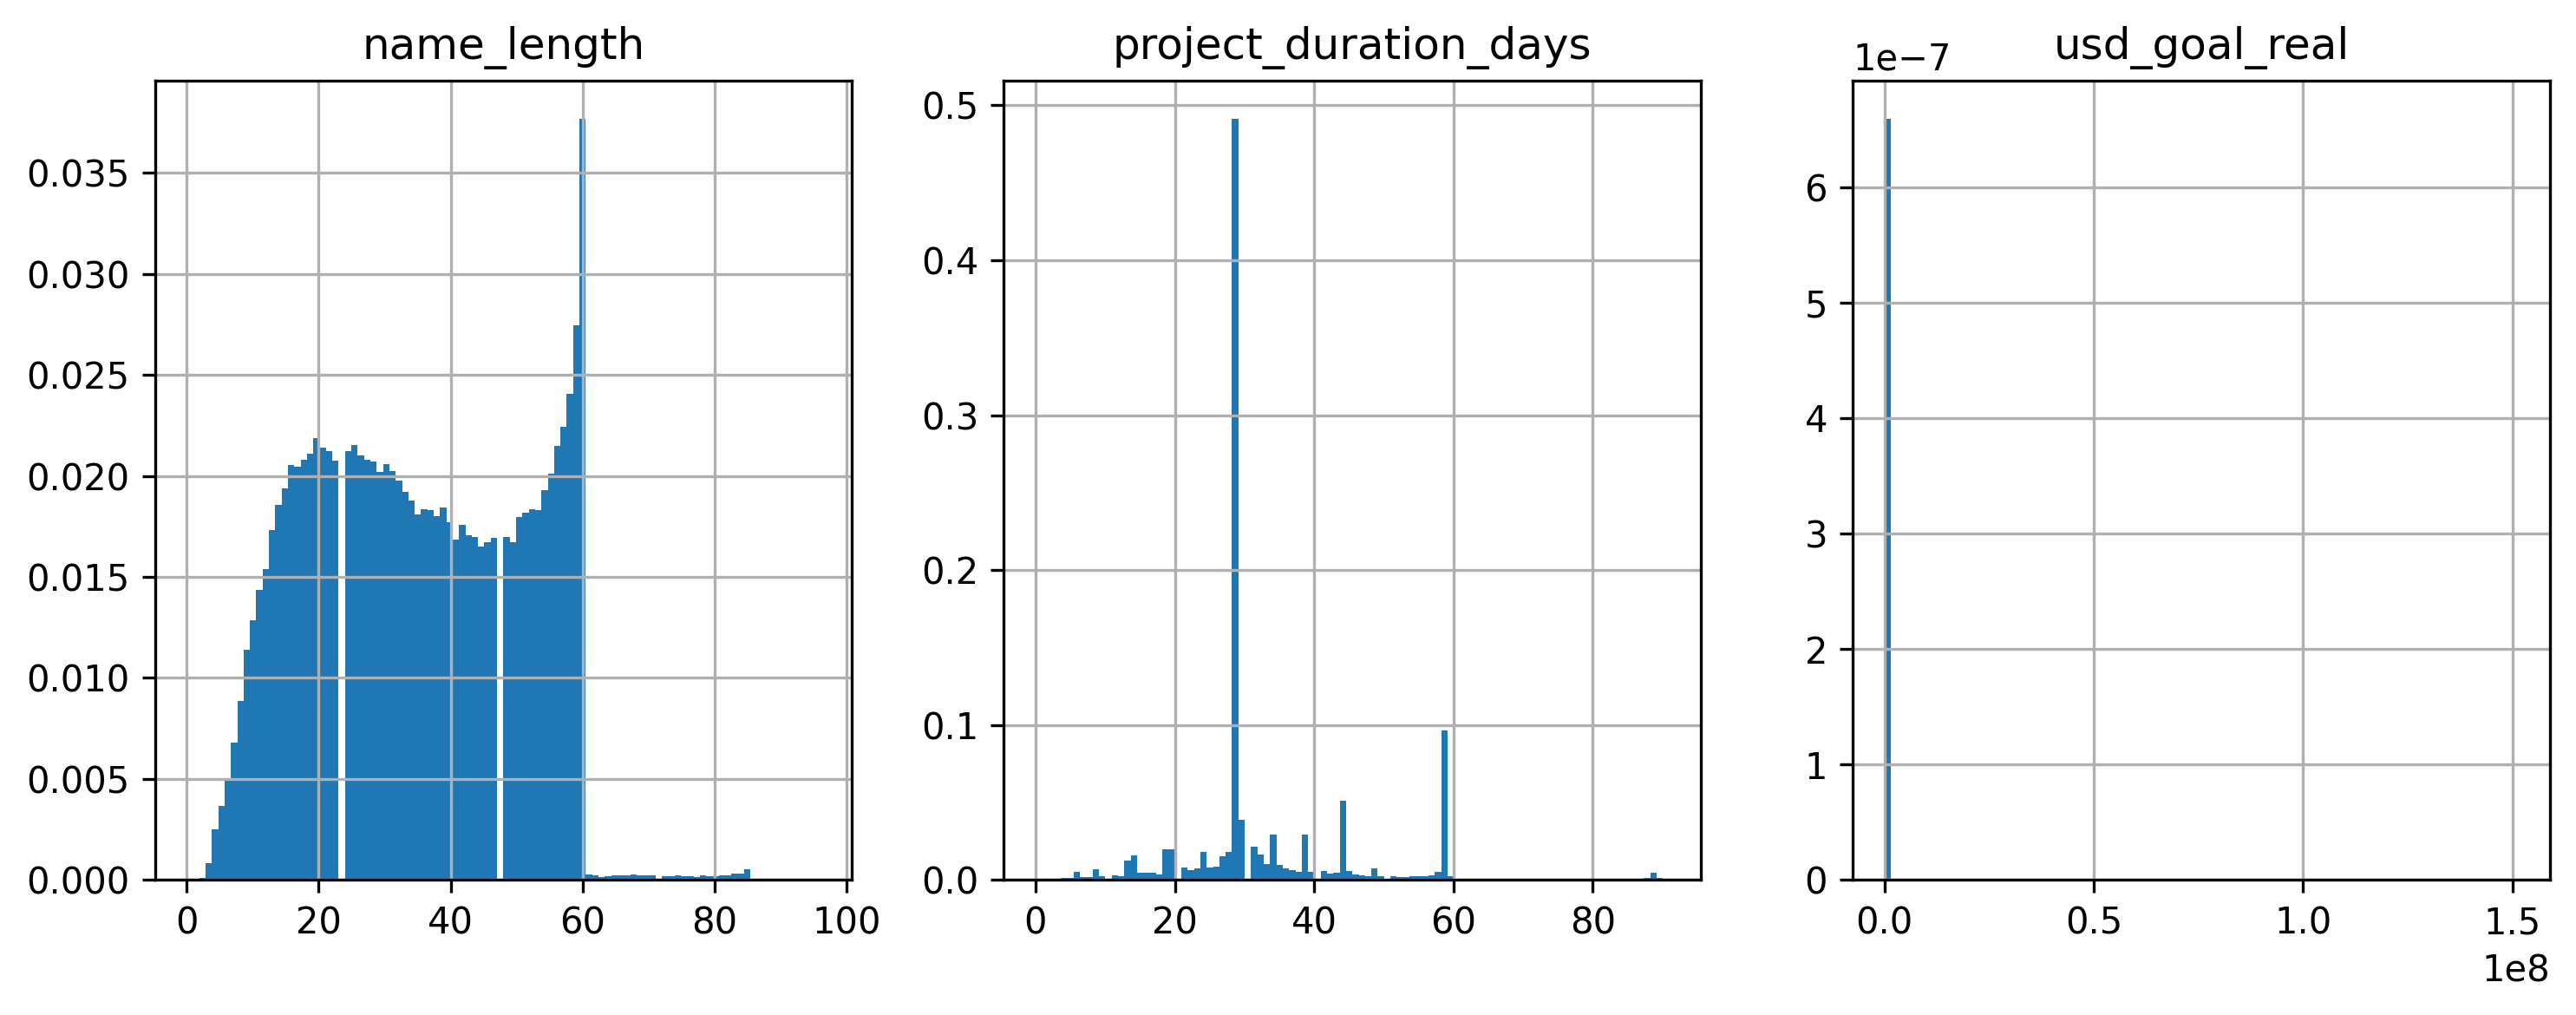

In [100]:
# Before
fg, axs = plt.subplots(dpi=300, ncols=3, figsize=(10, 4))
for col, ax in zip(numerical_cols, axs):
    train[col].hist(ax=ax, density=True, bins=100)
    ax.set_title(col)
fg.tight_layout()

In [101]:
# Training
transformer = preprocessing.PowerTransformer()
transformer.fit(train[numerical_cols]);

In [102]:
# Transform
scaled = transformer.transform(train[numerical_cols])

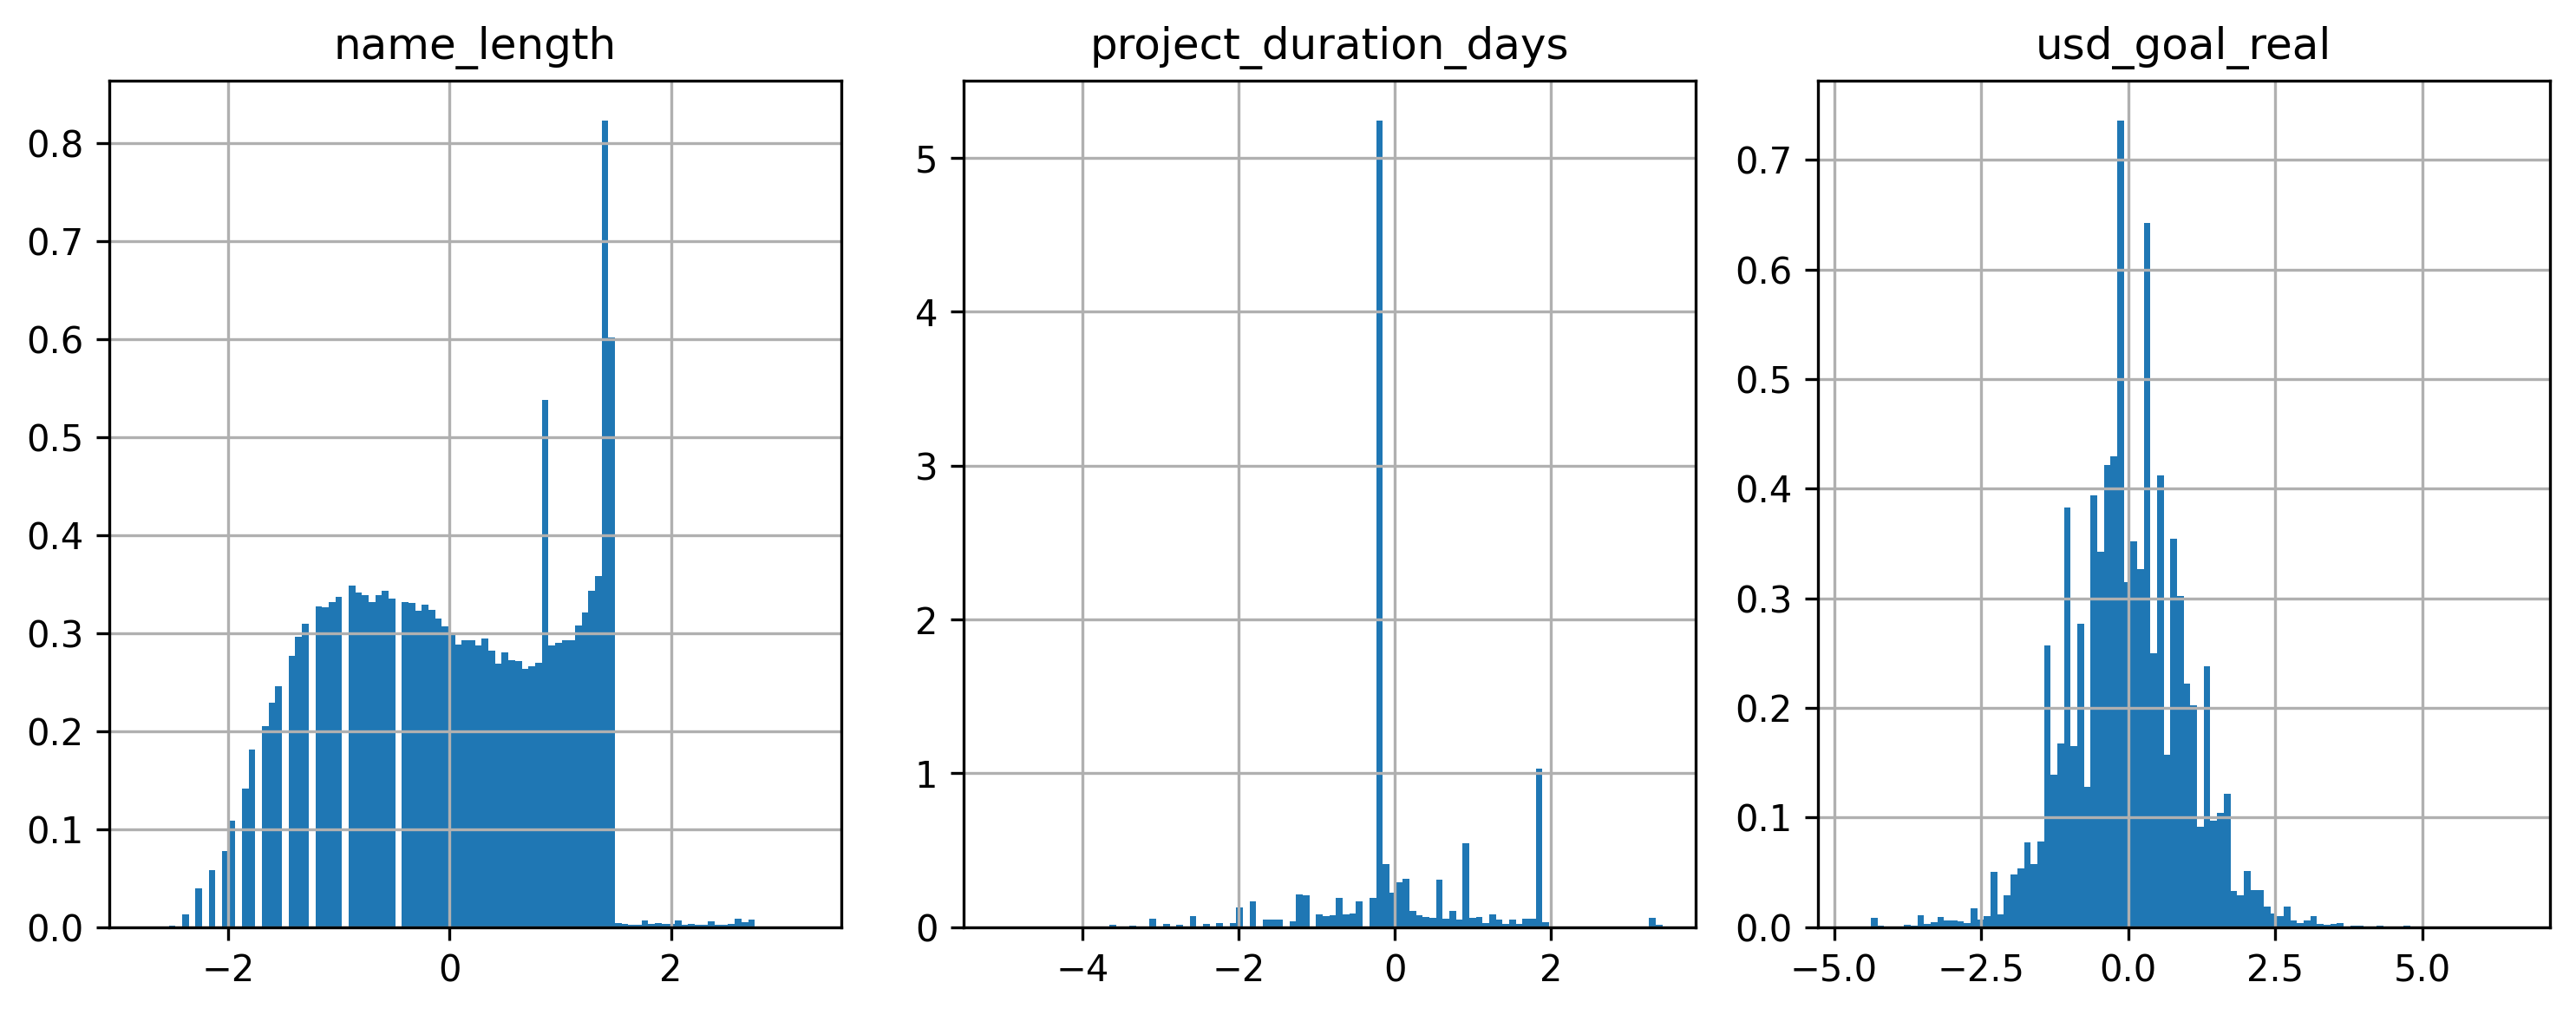

In [108]:
# After!
fg, axs = plt.subplots(dpi=300, ncols=3, figsize=(10, 4))
for col, vals, ax in zip(numerical_cols, scaled.T, axs):
    pd.Series(vals).hist(ax=ax, density=True, bins=100)
    ax.set_title(col)
fg.tight_layout()

### 7.1.3 Putting it all together for our feature engineering

We use the `ColumnTransformer` which lets us apply different transformers to different columns. It's so good.

In [109]:
from sklearn.compose import ColumnTransformer

In [111]:
features = ColumnTransformer(
    transformers=[
        ('onehot', preprocessing.OneHotEncoder(drop=None, handle_unknown='ignore'), ['main_category']),
        ('scaler', preprocessing.PowerTransformer(), ['name_length', 'project_duration_days', 'usd_goal_real'])
    ],
    remainder='passthrough'  # any other colunms just get used as-is
)

In [ ]:
X_test = pd.concat([
    test[['whacky_name', 'launched_on_weekend']].astype(int),
    test[['name_length', 'project_duration_days', 'usd_goal_real']],
    pd.get_dummies(test['main_category'], drop_first=True),
], axis=1)
X_test['usd_goal_real'] = np.log(X_test['usd_goal_real'])
X_test['usd_goal_real'] = (X_test['usd_goal_real'] - X['usd_goal_real'].mean()) / X['usd_goal_real'].std()
X_test['name_length'] = (X_test['name_length'] - X['name_length'].mean()) / X['name_length'].std()

In [115]:
# Training
feature_names = [
    'whacky_name', 'launched_on_weekend', 'name_length',
    'project_duration_days', 'usd_goal_real',
    'main_category'
]
features.fit(train[feature_names]);

Sick!

In [121]:
# Transform
result = features.transform(train[feature_names])
result[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.12509146, -0.23580385, -0.29782357,  0.        ,  0.        ])

### 7.1.4 Adding a classifier to our pipeline

We're almost there, we've got a whole pipeline to transform data but now we want to put all that transformed data in our classifier.

In [122]:
from sklearn.pipeline import Pipeline

In [123]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot', preprocessing.OneHotEncoder(drop=None, handle_unknown='ignore'), ['main_category']),
        ('scaler', preprocessing.PowerTransformer(), ['name_length', 'project_duration_days', 'usd_goal_real'])
    ],
    remainder='passthrough'  # any other colunms just get used as-is
)

In [124]:
classifier = SGDClassifier()

In [125]:
pipeline = Pipeline(steps=[
    ('feature_processing', transformer),
    ('classifier', classifier),
])

So now all we have to do is pass in our raw data in one end of the pipe and we get a classifier out the other end!!

In [127]:
feature_names

['whacky_name',
 'launched_on_weekend',
 'name_length',
 'project_duration_days',
 'usd_goal_real',
 'main_category']

In [131]:
pipeline.fit(train[feature_names], y);

In [132]:
y_pred = pipeline.predict(train[feature_names])
y_pred[:5]

array([False, False, False, False,  True])

## 7.2 Running our pipeline for testing

Now we can pass raw data in there's no more processing to do for the test data!

Not bad

In [133]:
y_pred = pipeline.predict(test[feature_names])
metrics.accuracy_score(y_test, y_pred)

0.6485540334855403

## 7.3 Cross validation

A huge benefit of the pipeline is that now all our feature processing happens in each cross validation too. So we get an even more fair test of performance!

**we only need 1 line to do 5-fold cross validated scoring on our training data

In [137]:
cross_val_score(pipeline, train[feature_names], y)

array([0.65339012, 0.6509919 , 0.65281455, 0.6511262 , 0.65273114])

## 7.4 Grid search gets crazy!

Remember that we did a grid search over the hyperparameters of our predictor. Now we can search over different transformations too.

To pass parameters to different stages of the pipeline we use double underscore `__` to separate the name from the parameter.

In [141]:
preprocessing.PowerTransformer?

In [142]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'classifier__alpha': np.logspace(-7, 1, 6),
        'classifier__loss': ['hinge', 'log'], 
        'feature_processing__scaler__standardize': [True, False]  # try scaling with out without standardisation
    },
    scoring='accuracy',
    cv=3,
)

**WARNING** takes some time! Like 15 mins? Maybe longer.

In [143]:
grid_search.fit(train[feature_names], y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                      

## 7.5 Best parameters

So we've got our best classifier parameters and we can see that standardisation is best.

In [144]:
grid_search.best_params_

{'classifier__alpha': 0.00015848931924611142,
 'classifier__loss': 'log',
 'feature_processing__scaler__standardize': True}

## 7.6 Testing the ultimate pipeline

In [146]:
y_pred = grid_search.best_estimator_.predict(test[feature_names])

In [147]:
metrics.accuracy_score(y_test, y_pred)

0.6692720923986033

Not bad.